In [1]:
# p.504
import numpy as np
import keras
import matplotlib.pyplot as plt

%matplotlib inline

def generate_time_series(batch_size, n_steps):
    freq1, freq2, offsets1, offsets2 = np.random.rand(4, batch_size, 1)
    time = np.linspace(0,1,n_steps)
    series = 0.5*np.sin((time-offsets1)*(freq1*10+10)) # wave 1
    series += 0.2*np.sin((time-offsets2)*(freq2*20+20)) # wave 2
    series += 0.1*(np.random.rand(batch_size, n_steps)-0.5) # noise
    return series[...,np.newaxis].astype(np.float32)    

Using TensorFlow backend.


In [2]:
# create training, test and validation data sets using this function

n_steps = 50
series = generate_time_series(10000, n_steps+1)
X_train, y_train = series[:7000, :n_steps], series[:7000, -1]
X_valid, y_valid = series[7000:9000, :n_steps], series[7000:9000, -1]
X_test, y_test = series[9000:, :n_steps], series[9000:, -1]

## 1.- Create the baseline metrics

In [3]:
# Baseline metrics
# Naive forecasting: using the last valuein the series

y_pred = X_valid[:, -1]
np.mean(keras.losses.mean_squared_error(y_valid, y_pred))

0.02056435

In [4]:
# Using a fully connected network

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[50,1]),
    keras.layers.Dense(1)
])

In [5]:
model.compile("Adam", loss="MSE")
model.fit(X_train,y_train, epochs=20, verbose=2)

Epoch 1/20
 - 0s - loss: 0.0487
Epoch 2/20
 - 0s - loss: 0.0142
Epoch 3/20
 - 0s - loss: 0.0115
Epoch 4/20
 - 0s - loss: 0.0099
Epoch 5/20
 - 0s - loss: 0.0085
Epoch 6/20
 - 0s - loss: 0.0074
Epoch 7/20
 - 0s - loss: 0.0065
Epoch 8/20
 - 0s - loss: 0.0058
Epoch 9/20
 - 0s - loss: 0.0053
Epoch 10/20
 - 0s - loss: 0.0049
Epoch 11/20
 - 0s - loss: 0.0046
Epoch 12/20
 - 0s - loss: 0.0044
Epoch 13/20
 - 0s - loss: 0.0043
Epoch 14/20
 - 0s - loss: 0.0041
Epoch 15/20
 - 0s - loss: 0.0040
Epoch 16/20
 - 0s - loss: 0.0039
Epoch 17/20
 - 0s - loss: 0.0039
Epoch 18/20
 - 0s - loss: 0.0038
Epoch 19/20
 - 0s - loss: 0.0037
Epoch 20/20
 - 0s - loss: 0.0037


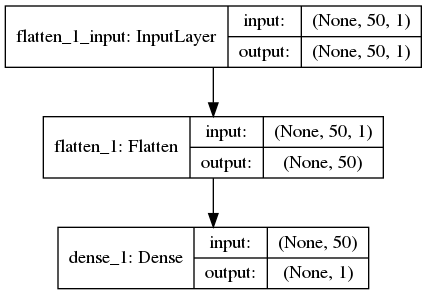

In [6]:
from keras.utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True,
    rankdir='TB', expand_nested=True, dpi=96)

## 2.- Implement a simple RNN Model

In [7]:
model = keras.models.Sequential([
    keras.layers.SimpleRNN(1, input_shape=[None, 1])
])

model.compile("Adam", loss="MSE")
model.fit(X_train,y_train, epochs=20, verbose=2)

Epoch 1/20
 - 2s - loss: 0.0741
Epoch 2/20
 - 2s - loss: 0.0519
Epoch 3/20
 - 2s - loss: 0.0358
Epoch 4/20
 - 2s - loss: 0.0243
Epoch 5/20
 - 2s - loss: 0.0173
Epoch 6/20
 - 2s - loss: 0.0138
Epoch 7/20
 - 2s - loss: 0.0124
Epoch 8/20
 - 2s - loss: 0.0120
Epoch 9/20
 - 2s - loss: 0.0118
Epoch 10/20
 - 2s - loss: 0.0117
Epoch 11/20
 - 2s - loss: 0.0116
Epoch 12/20
 - 2s - loss: 0.0116
Epoch 13/20
 - 2s - loss: 0.0115
Epoch 14/20
 - 2s - loss: 0.0114
Epoch 15/20
 - 2s - loss: 0.0114
Epoch 16/20
 - 2s - loss: 0.0114
Epoch 17/20
 - 2s - loss: 0.0114
Epoch 18/20
 - 2s - loss: 0.0113
Epoch 19/20
 - 2s - loss: 0.0113
Epoch 20/20
 - 2s - loss: 0.0113


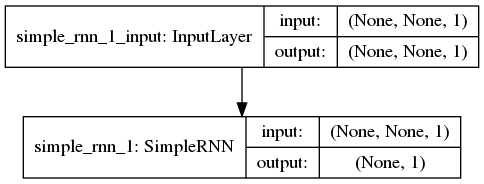

In [8]:
from keras.utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True,
    rankdir='TB', expand_nested=True, dpi=96)

## 3.- Implement a Deep RNN

In [9]:
model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None,1]),
    keras.layers.SimpleRNN(20, return_sequences=True),
    keras.layers.SimpleRNN(1)
])

In [ ]:
model.compile("Adam", loss="MSE")
model.fit(X_train,y_train, epochs=20, verbose=2)

Epoch 1/20
 - 6s - loss: 0.0225
Epoch 2/20
 - 5s - loss: 0.0063
Epoch 3/20
 - 5s - loss: 0.0049
Epoch 4/20
 - 5s - loss: 0.0042
Epoch 5/20
 - 7s - loss: 0.0040
Epoch 6/20
 - 6s - loss: 0.0038
Epoch 7/20
 - 6s - loss: 0.0036
Epoch 8/20
 - 6s - loss: 0.0036
Epoch 9/20
 - 6s - loss: 0.0036
Epoch 10/20
 - 6s - loss: 0.0034
Epoch 11/20
 - 6s - loss: 0.0034
Epoch 12/20
 - 6s - loss: 0.0032
Epoch 13/20
 - 6s - loss: 0.0033
Epoch 14/20
 - 6s - loss: 0.0031
Epoch 15/20
 - 6s - loss: 0.0032
Epoch 16/20
 - 6s - loss: 0.0031
Epoch 17/20
 - 6s - loss: 0.0032
Epoch 18/20
 - 6s - loss: 0.0031
Epoch 19/20
 - 7s - loss: 0.0031
Epoch 20/20


In [ ]:
from keras.utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True,
    rankdir='TB', expand_nested=True, dpi=96)

## 4.- Forecasting several steps ahead

In [ ]:
series = generate_time_series(1, n_steps+10)
X_new, Y_new = series[:, :n_steps], series[:, n_steps:]
X = X_new
for step_ahead in range(10):
    y_pred_one = model.predict(X[:, step_ahead:])[:, np.newaxis,:]
    X = np.concatenate([X, y_pred_one], axis=1)

Y_pred = X[:, n_steps:]

In [ ]:
plt.figure(1, figsize = [12, 6]) 
plt.plot(X_new[0], label="X_new")
plt.plot(X[0], label="X_pred")
plt.show()